# Example Weight Change (Fig 2a)
Here we take an example weight update to show how weights were updated with a gradient+noise and then bounded.

In [1]:
from analysisUtil import *
import pandas as pd
import random
from scipy import stats
import numpy as np
df = pd.read_csv('combinedDataV07.csv')

In [2]:
colorDefs = {0.5:'#F1C40F',
            0.8:'#ED7D31',
            0.95:'#A93226',
            1.0:'#6A1B9A'}

excHidRat = 0.95
color = colorDefs[excHidRat]
dataSet = 'sparse095_10class'
weightDir = '/media/adamlab/My Passport/LIF Analysis Data/FashionMNIST/raw_data/'+dataSet+'/obj'

attempting to load:/media/adamlab/My Passport/LIF Analysis Data/FashionMNIST/raw_data/sparse095_10class/obj/sparse095_10class_108_t0_w1_init
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/FashionMNIST/raw_data/sparse095_10class/obj/sparse095_10class_108_t0_w1_e29_
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/FashionMNIST/raw_data/sparse095_10class/obj/sparse095_10class_116_t0_w1_init
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/FashionMNIST/raw_data/sparse095_10class/obj/sparse095_10class_116_t0_w1_e29_
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/FashionMNIST/raw_data/sparse095_10class/obj/sparse095_10class_140_t0_w1_init
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/FashionMNIST/raw_data/sparse095_10class/obj/sparse095_10class_140_t0_w1_e29_


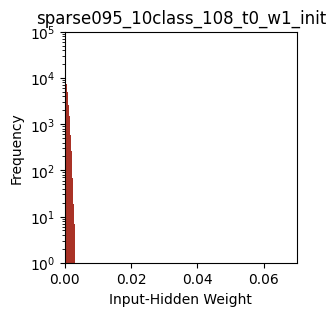

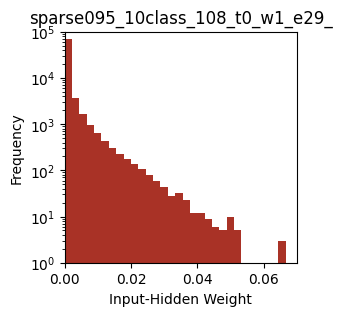

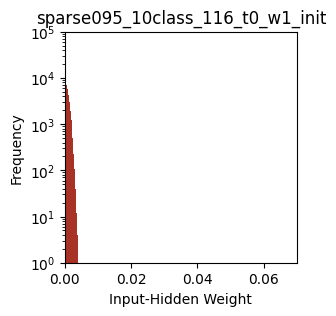

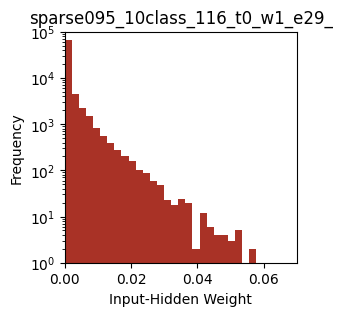

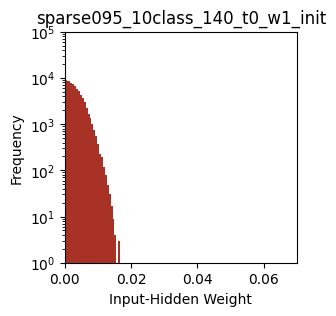

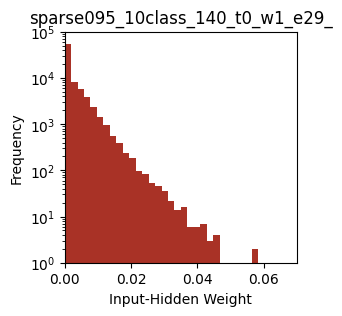

In [3]:
for t in ['_108_t0', '_116_t0','_140_t0']:
    for wTag in ['_w1_init','_w1_e29_']:
        simTag = dataSet+t
        w1_init = getWeightFromUniqueId(simTag+wTag, objFolder=weightDir).detach().numpy()
        counts, bins = np.histogram(w1_init, bins=30)
        fig, axs = plt.subplots(1,1, figsize=(3,3))
        plt.hist(bins[:-1], bins, weights=counts, color=color)
        plt.yscale('log')
        plt.ylim(1, 10e4)
        plt.xlim(0,0.07)
        plt.xlabel('Input-Hidden Weight')
        plt.ylabel('Frequency')
        plt.title(simTag+wTag)
        plt.savefig('./weightAnalysis/weight_dist/'+simTag+wTag+'_v02_SR.svg',bbox_inches='tight')

# Noise Example

attempting to load:/media/adamlab/My Passport/LIF Analysis Data/FashionMNIST/raw_data/noise_example/noise_example_t0_w1_init


Text(0.5, 1.0, 'noise_example_t0')

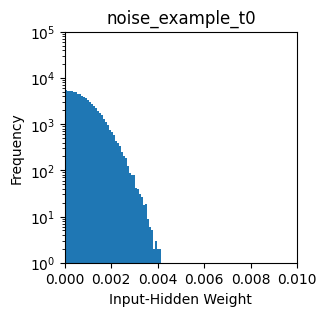

In [4]:
noiseWeightDir = '/media/adamlab/My Passport/LIF Analysis Data/FashionMNIST/raw_data/noise_example'
simTag = 'noise_example_t0'
w1_init = getWeightFromUniqueId(simTag+'_w1_init', objFolder=noiseWeightDir).detach().numpy()
fig, axs = plt.subplots(1,1, figsize=(3,3))
plt.hist(w1_init.flatten(), bins=50)
plt.yscale('log')
plt.ylim(1, 10e4)
plt.xlim(0,0.01)
plt.xlabel('Input-Hidden Weight')
plt.ylabel('Frequency')
plt.title(simTag)

In [5]:
import glob

files = glob.glob(noiseWeightDir+'/'+simTag+'_*_e1_b0_*.pkl')
files

['/media/adamlab/My Passport/LIF Analysis Data/FashionMNIST/raw_data/noise_example/noise_example_t0_w1_grad_e1_b0_2024-03-22_12-02-33.pkl',
 '/media/adamlab/My Passport/LIF Analysis Data/FashionMNIST/raw_data/noise_example/noise_example_t0_w1_noise_e1_b0_2024-03-22_12-02-33.pkl',
 '/media/adamlab/My Passport/LIF Analysis Data/FashionMNIST/raw_data/noise_example/noise_example_t0_w1_post_noise_e1_b0_2024-03-22_12-02-33.pkl',
 '/media/adamlab/My Passport/LIF Analysis Data/FashionMNIST/raw_data/noise_example/noise_example_t0_w1_pre_noise_e1_b0_2024-03-22_12-02-33.pkl',
 '/media/adamlab/My Passport/LIF Analysis Data/FashionMNIST/raw_data/noise_example/noise_example_t0_w1_pre_update_e1_b0_2024-03-22_12-02-33.pkl',
 '/media/adamlab/My Passport/LIF Analysis Data/FashionMNIST/raw_data/noise_example/noise_example_t0_w2_noise_e1_b0_2024-03-22_12-02-33.pkl',
 '/media/adamlab/My Passport/LIF Analysis Data/FashionMNIST/raw_data/noise_example/noise_example_t0_w2_post_noise_e1_b0_2024-03-22_12-02-33.p

In [6]:
epoch = 0
batch = 5
w1_init = getWeightFromUniqueId(simTag+'_w1_init', objFolder=noiseWeightDir).detach().numpy()
w1_grad = getWeightFromUniqueId(simTag+'_w1_grad_e'+str(epoch)+'_b'+str(batch), objFolder=noiseWeightDir).detach().numpy()
w1_pre_noise = getWeightFromUniqueId(simTag+'_w1_pre_noise_e'+str(epoch)+'_b'+str(batch), objFolder=noiseWeightDir).detach().numpy()
w1_noise = getWeightFromUniqueId(simTag+'_w1_noise_e'+str(epoch)+'_b'+str(batch), objFolder=noiseWeightDir).detach().numpy()
w1_pre_update = getWeightFromUniqueId(simTag+'_w1_pre_update_e'+str(epoch)+'_b'+str(batch), objFolder=noiseWeightDir).detach().numpy()
w1_post_noise = getWeightFromUniqueId(simTag+'_w1_post_noise_e'+str(epoch)+'_b'+str(batch), objFolder=noiseWeightDir).detach().numpy()

attempting to load:/media/adamlab/My Passport/LIF Analysis Data/FashionMNIST/raw_data/noise_example/noise_example_t0_w1_init
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/FashionMNIST/raw_data/noise_example/noise_example_t0_w1_grad_e0_b5
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/FashionMNIST/raw_data/noise_example/noise_example_t0_w1_pre_noise_e0_b5
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/FashionMNIST/raw_data/noise_example/noise_example_t0_w1_noise_e0_b5
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/FashionMNIST/raw_data/noise_example/noise_example_t0_w1_pre_update_e0_b5
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/FashionMNIST/raw_data/noise_example/noise_example_t0_w1_post_noise_e0_b5


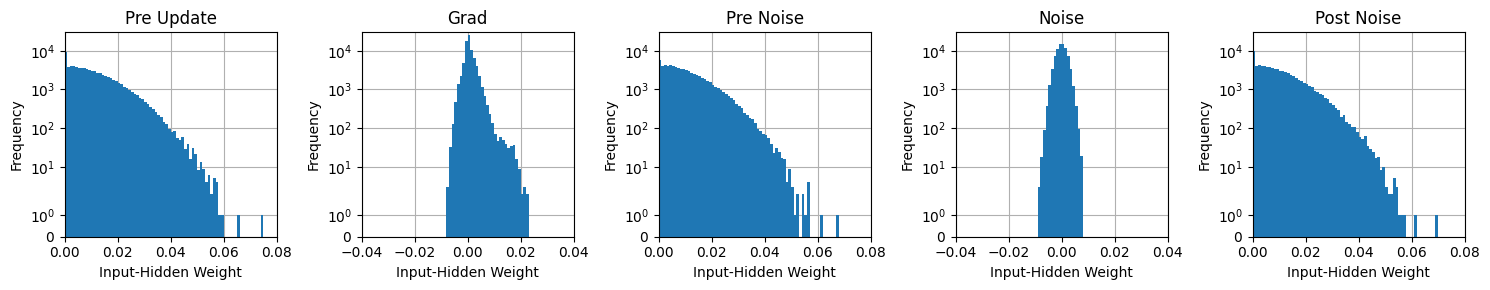

In [7]:
fig, axs = plt.subplots(1,5, figsize=(15,3))
binwidth = 0.001
axs[0].hist(w1_pre_update.flatten(), bins=np.arange(0, 0.08 + binwidth, binwidth))
axs[1].hist(w1_grad.flatten(), bins=np.arange(-0.04, 0.04 + binwidth, binwidth))
axs[2].hist(w1_pre_noise.flatten(), bins=np.arange(0, 0.08 + binwidth, binwidth))
axs[3].hist(w1_noise.flatten(), bins=np.arange(-0.04, 0.04 + binwidth, binwidth))
axs[4].hist(w1_post_noise.flatten(), bins=np.arange(0, 0.08 + binwidth, binwidth))


for i in range(5):
    axs[i].set_xlabel('Input-Hidden Weight')
    axs[i].set_ylabel('Frequency')
    axs[i].set_yscale('symlog')
    axs[i].set_ylim(0,30000)
    axs[i].grid()
    axs[i].set_axisbelow(True)
#axs[1].set_xlim(-0.01, 0.1)

for i in [0,2,4]:
    axs[i].set_xlim(0,0.08)


for i in [1,3]:
    axs[i].set_xlim(-0.04, 0.04)

axs[0].set_title('Pre Update')
axs[1].set_title('Grad')
axs[2].set_title('Pre Noise')
axs[3].set_title('Noise')
axs[4].set_title('Post Noise')

plt.tight_layout()
plt.savefig('./weightAnalysis/all_data_e0_b5V04_SR.svg', bbox_inches='tight')